# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [12]:
# Importing libraries for numerical operations, data manipulation, and visualization
import numpy as np  # For numerical operations like arrays
import pandas as pd  # For structured data operations

# Enabling autoreload in Jupyter to auto-update imported modules on code execution
%load_ext autoreload
%autoreload 2

# Importing matplotlib for plotting and setting default plot aesthetics and font size
import matplotlib.pyplot as plt
plt.rcParams.update({
    "axes.grid": True, "grid.color": "black",
    "grid.alpha": 0.25, "grid.linestyle": "--", 'font.size': 14
})

# Importing a custom module specific to this project
import inauguralproject

# Importing optimize from scipy for mathematical optimization tasks
from scipy import optimize


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

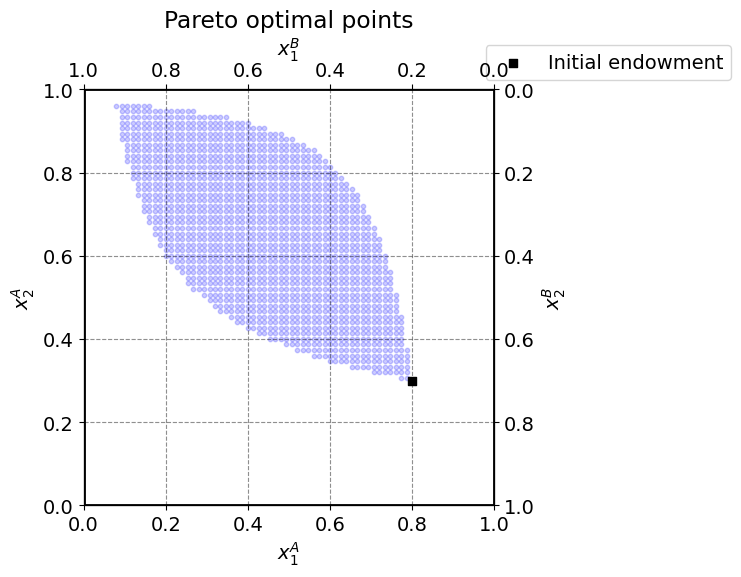

In [57]:
# Import necessary functions from your inauguralproject module
from inauguralproject import utility_A, utility_B, pareto_improvements

# Define initial parameters
omega_A1 = 0.8
omega_A2 = 0.3
alpha = 1/3
beta = 2/3

# Generate Pareto improvements
improvements = pareto_improvements(omega_A1, omega_A2, alpha, beta)

# Set up the figure
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax1 = fig.add_subplot(1, 1, 1)

# Set labels for Consumer A's axes
ax1.set_xlabel("$x_1^A$")
ax1.set_ylabel("$x_2^A$")

# Create secondary axes for Consumer B's goods
temp = ax1.twinx()
temp.set_ylabel("$x_2^B$")
ax2 = temp.twiny()
ax2.set_xlabel("$x_1^B$")

# Plot the Pareto set using the 'improvements' variable
ax1.scatter(improvements[:, 0], improvements[:, 1], s=10, alpha=0.2, color='blue')

# Highlight the initial endowments with a square marker
ax1.scatter(omega_A1, omega_A2, marker="s", color="black", label="Initial endowment")

# Create title
plt.title('Pareto optimal points')

# Enable grid for primary axes
ax1.grid(True)
plt.tight_layout()

# Plot the borders of the Edgeworth box
w1bar = 1.0
w2bar = 1.0
ax1.plot([0, w1bar], [0, 0], lw=2, color='black')
ax1.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax1.plot([0, 0], [0, w2bar], lw=2, color='black')
ax1.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Set limits for the axes
ax1.set_xlim([0, w1bar])
ax1.set_ylim([0, w2bar])
ax2.set_xlim([w1bar, 0])
ax2.set_ylim([w2bar , 0])

# Show the legend
ax1.legend(frameon=True, loc='lower right', bbox_to_anchor=(1.6, 1.0))

# Display the plot
plt.show()


# Question 2

Explain your code and procedure

In [58]:
# code

# Question 3

Explain your code and procedure

In [59]:
# code

ADD CONCISE CONLUSION.